# Imports and custom functions

In [1]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [2]:
# Global options

sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

xlim=(0,14)
ylim=(-14, 10)
alpha=1
# marker='o'
s=10
legend=False
linewidth=0

In [3]:
def prepare_df(df_path, df_name):

    """Read in information from dataframe"""

    # read in df1
    df = pd.read_csv(df_path, header=0, sep="\t")
    # Mark significants
    df["Significant"]  = "No"
    df.loc[(df["FDR"] < 0.05) & (df["logCPM"]>2), "Significant"] = "FDR<0.05\nlogCPM>2"
    # set id as index
    df.set_index("id", inplace=True)
    # rename columns
    df.columns = df.columns + "_" + df_name
    # reset index
    df.reset_index(inplace=True)

    return df

In [4]:
def merge_df(df_1, df_2, df_1_name, df_2_name):
    
    """Merge dataframes"""
    
    df = pd.merge(df_1, df_2, on="id", how="right")
    
    df["Significant"] = "No"
    
    df.loc[(df[f"FDR_{df_2_name}"]<0.05) &
               (df[f"logCPM_{df_2_name}"]>2),
               "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2"
    
    df.loc[(df[f"FDR_{df_2_name}"]<0.05) &
               (df[f"logCPM_{df_2_name}"]>2) &
               (df[f"FDR_{df_1_name}"]<0.05) &
               (df[f"logFC_{df_1_name}"]>0) &
               (df[f"logCPM_{df_1_name}"]>2),
                "Significant"] = f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"
    
    return df

In [5]:
def prepare_sc_plot(df, df_1_name, df_2_name):
    sns_plot = sns.scatterplot(x=f"logCPM_{df_2_name}",
                               y=f"logFC_{df_2_name}",
                               data=df.sort_values(["Significant"]),
                               s=s,
                               hue="Significant",
                               hue_order=["No", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2", f"FDR_{df_2_name}<0.05\nlogCPM_{df_2_name}>2\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogCPM_{df_1_name}>2"],
                               palette=["black", "blue", "red"],
                               alpha=alpha,
                               x_jitter=x_jitter,
                               y_jitter=y_jitter,
                               linewidth=linewidth)
    sns_plot.set(xlim=xlim, ylim=ylim)

    return sns_plot

In [6]:
def prepare_sc_plot_simple(df, df_name):
    sns_plot = sns.scatterplot(x=f"logCPM_{df_name}",
                               y=f"logFC_{df_name}",
                               data=df.sort_values([f"Significant_{df_name}"]),
                               s=s,
                               hue=f"Significant_{df_name}",
                               hue_order=["No", "FDR<0.05\nlogCPM>2"],
                               palette=["black", "blue"],
                               alpha=alpha,
                               x_jitter=x_jitter,
                               y_jitter=y_jitter,
                               linewidth=linewidth)
    sns_plot.set(xlim=xlim, ylim=ylim)
    return sns_plot

# Input files

In [7]:
ip_path = "../WAGO_3_IP/results/DE__N2_Input_Rpph__N2_xf119_Rpph/plot_small_RNAs/22G.tsv"
ip_name = "WAGO-3"

ip_wago_9_path = "../WAGO_9_IP/results/DE__wago-9_input__wago-9_IP/plot_small_RNAs/22G.tsv"
ip_wago_9_name = "WAGO-9"

ip_csr_1_path = "../csr_1_IP/results/DE__csr-1_input__csr-1_IP/plot_small_RNAs/22G.tsv"
ip_csr_1_name = "csr-1"

Dpf_3_null_path = "../small_RNA_seq_15_C/results/filter/DE__WT_D_E_F__Dpf_3_null/plot_small_RNAs/22G.tsv"
Dpf_3_null_name = "Dpf_3_null"

Dpf_3_S784A_path = "../small_RNA_seq_15_C/results/filter/DE__WT_A_B_C__Dpf_3_S784A/plot_small_RNAs/22G.tsv"
Dpf_3_S784A_name = "Dpf_3_S784A"

mut_2_path = "../small_RNA_seq_15_C/results/filter/DE__WT_D_E_F__mut_2/plot_small_RNAs/22G.tsv"
mut_2_name = "mut_2"

# Manually read in the different files

In [8]:
# read in dataframe
df_wago_3 = prepare_df(ip_path, ip_name)
df_wago_9 = prepare_df(ip_wago_9_path, ip_wago_9_name)
df_csr_1 = prepare_df(ip_csr_1_path, ip_csr_1_name)
df_Dpf_3_null = prepare_df(Dpf_3_null_path, Dpf_3_null_name)
df_Dpf_3_S784A = prepare_df(Dpf_3_S784A_path, Dpf_3_S784A_name)
df_mut_2 = prepare_df(mut_2_path, mut_2_name)

In [9]:
# merge dfs pairwise
df_wago_3_Dpf_3_null = merge_df(df_wago_3, df_Dpf_3_null, ip_name, Dpf_3_null_name)
df_wago_3_Dpf_3_S784A = merge_df(df_wago_3, df_Dpf_3_S784A, ip_name, Dpf_3_S784A_name)
df_wago_3_mut_2 = merge_df(df_wago_3, df_mut_2, ip_name, mut_2_name)

df_wago_9_Dpf_3_null = merge_df(df_wago_9, df_Dpf_3_null, ip_wago_9_name, Dpf_3_null_name)
df_wago_9_Dpf_3_S784A = merge_df(df_wago_9, df_Dpf_3_S784A, ip_wago_9_name, Dpf_3_S784A_name)
df_wago_9_mut_2 = merge_df(df_wago_9, df_mut_2, ip_wago_9_name, mut_2_name)

df_csr_1_Dpf_3_null = merge_df(df_csr_1, df_Dpf_3_null, ip_csr_1_name, Dpf_3_null_name)
df_csr_1_Dpf_3_S784A = merge_df(df_csr_1, df_Dpf_3_S784A, ip_csr_1_name, Dpf_3_S784A_name)
df_csr_1_mut_2 = merge_df(df_csr_1, df_mut_2, ip_csr_1_name, mut_2_name)

In [10]:
df_wago_3_Dpf_3_null["Significant"].value_counts()

FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2\nFDR_WAGO-3<0.05\nlogFC_WAGO-3>0\nlogCPM_WAGO-3>2    2363
No                                                                                            2174
FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2                                                      1223
Name: Significant, dtype: int64

In [11]:
df_wago_3_Dpf_3_S784A["Significant"].value_counts()

FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2\nFDR_WAGO-3<0.05\nlogFC_WAGO-3>0\nlogCPM_WAGO-3>2    1778
No                                                                                              1125
FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2                                                       947
Name: Significant, dtype: int64

In [12]:
df_wago_3_mut_2["Significant"].value_counts()

FDR_mut_2<0.05\nlogCPM_mut_2>2\nFDR_WAGO-3<0.05\nlogFC_WAGO-3>0\nlogCPM_WAGO-3>2    2819
FDR_mut_2<0.05\nlogCPM_mut_2>2                                                      2556
No                                                                                    67
Name: Significant, dtype: int64

In [13]:
df_wago_9_Dpf_3_null["Significant"].value_counts()

FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2                                                      2617
No                                                                                            2174
FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2\nFDR_WAGO-9<0.05\nlogFC_WAGO-9>0\nlogCPM_WAGO-9>2     969
Name: Significant, dtype: int64

In [14]:
df_wago_9_Dpf_3_S784A["Significant"].value_counts()

FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2                                                      1895
No                                                                                              1125
FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2\nFDR_WAGO-9<0.05\nlogFC_WAGO-9>0\nlogCPM_WAGO-9>2     830
Name: Significant, dtype: int64

In [15]:
df_wago_9_mut_2["Significant"].value_counts()

FDR_mut_2<0.05\nlogCPM_mut_2>2                                                      4061
FDR_mut_2<0.05\nlogCPM_mut_2>2\nFDR_WAGO-9<0.05\nlogFC_WAGO-9>0\nlogCPM_WAGO-9>2    1314
No                                                                                    67
Name: Significant, dtype: int64

In [16]:
df_csr_1_Dpf_3_null["Significant"].value_counts()

FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2                                                   3432
No                                                                                         2174
FDR_Dpf_3_null<0.05\nlogCPM_Dpf_3_null>2\nFDR_csr-1<0.05\nlogFC_csr-1>0\nlogCPM_csr-1>2     154
Name: Significant, dtype: int64

In [17]:
df_csr_1_Dpf_3_S784A["Significant"].value_counts()

FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2                                                   2579
No                                                                                           1125
FDR_Dpf_3_S784A<0.05\nlogCPM_Dpf_3_S784A>2\nFDR_csr-1<0.05\nlogFC_csr-1>0\nlogCPM_csr-1>2     146
Name: Significant, dtype: int64

In [18]:
df_csr_1_mut_2["Significant"].value_counts()

FDR_mut_2<0.05\nlogCPM_mut_2>2                                                   5015
FDR_mut_2<0.05\nlogCPM_mut_2>2\nFDR_csr-1<0.05\nlogFC_csr-1>0\nlogCPM_csr-1>2     360
No                                                                                 67
Name: Significant, dtype: int64

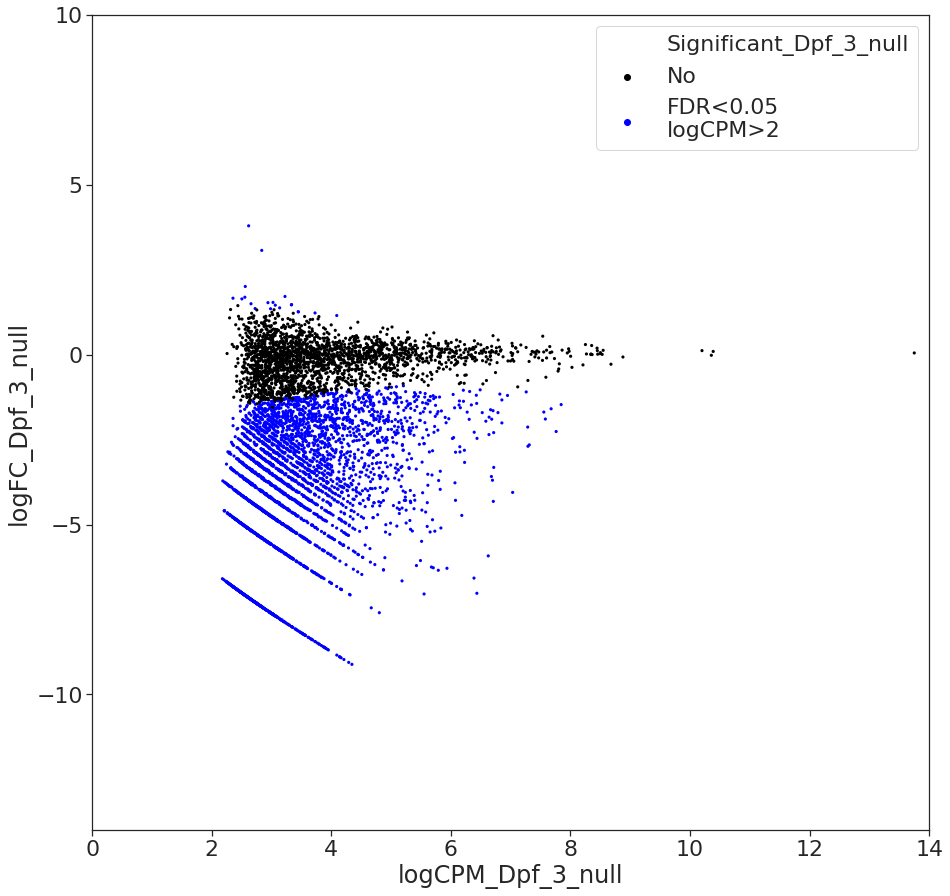

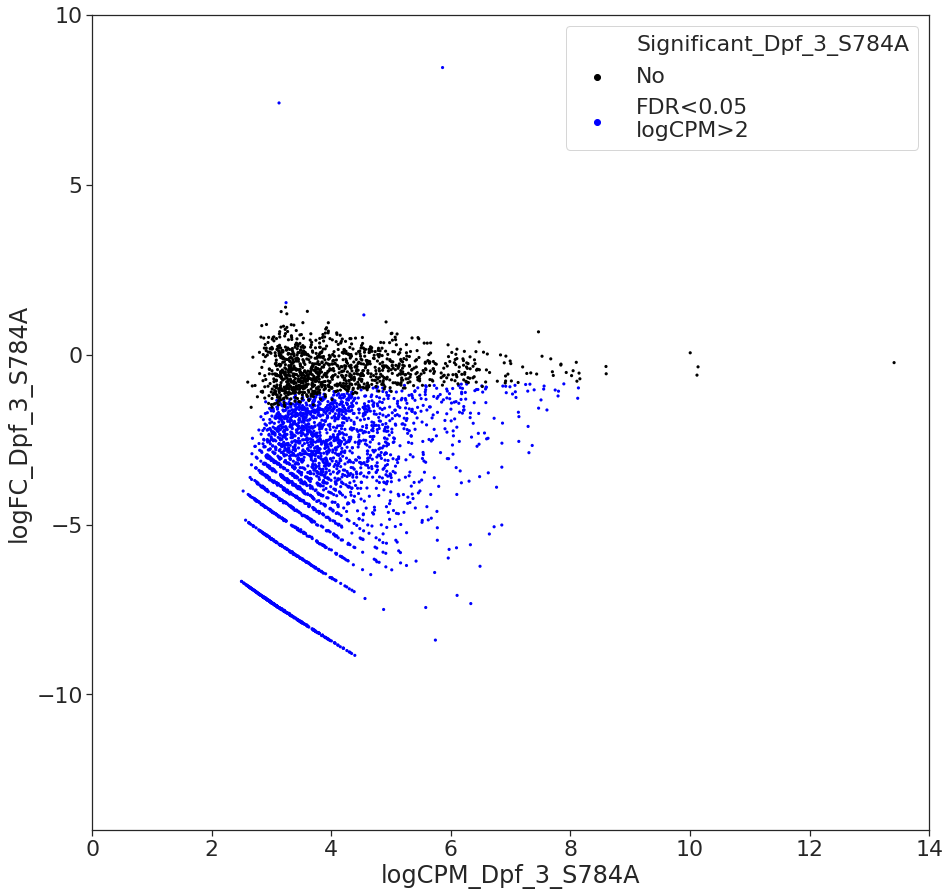

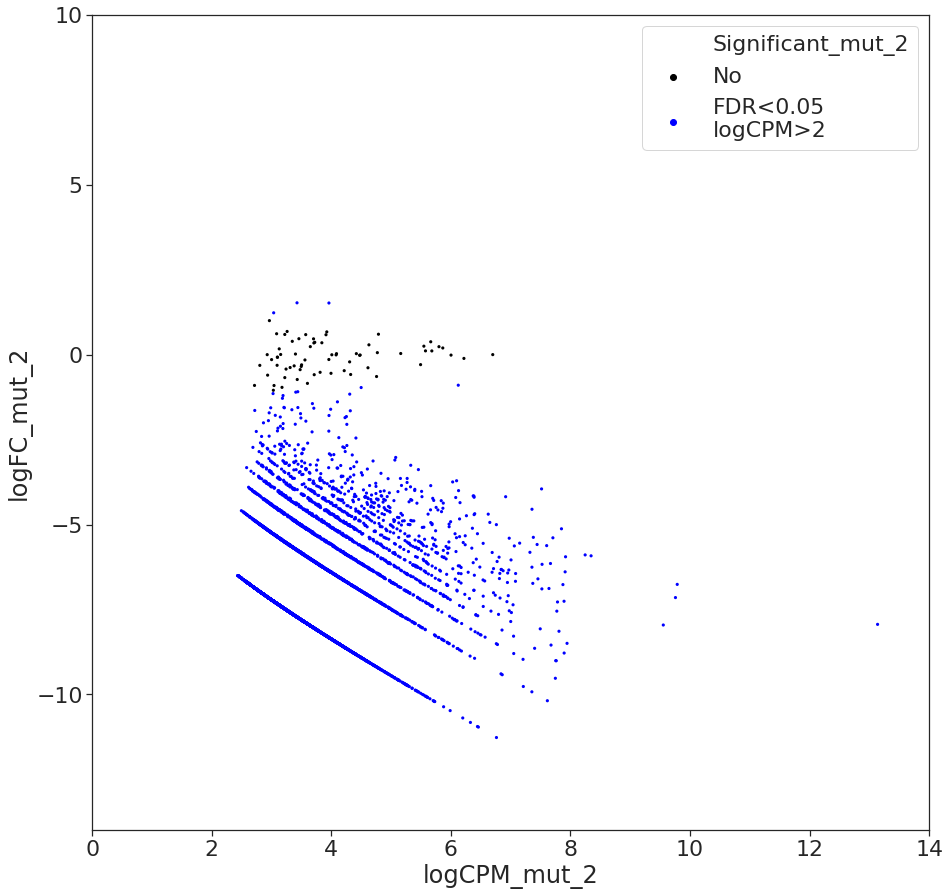

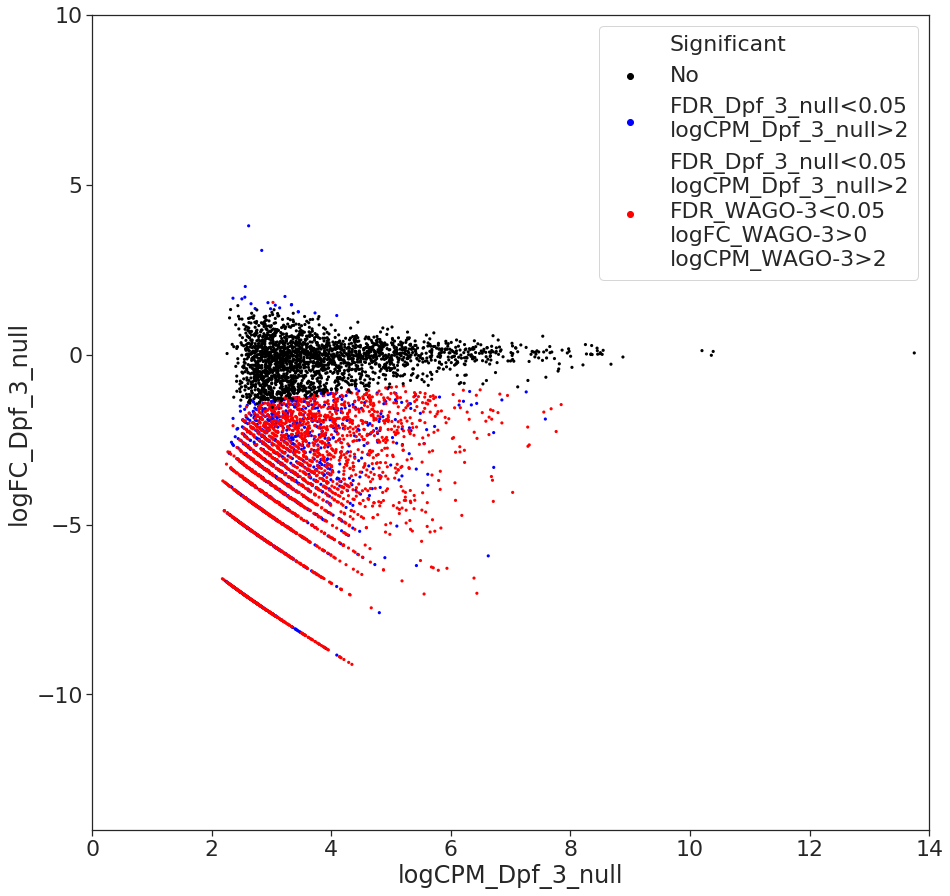

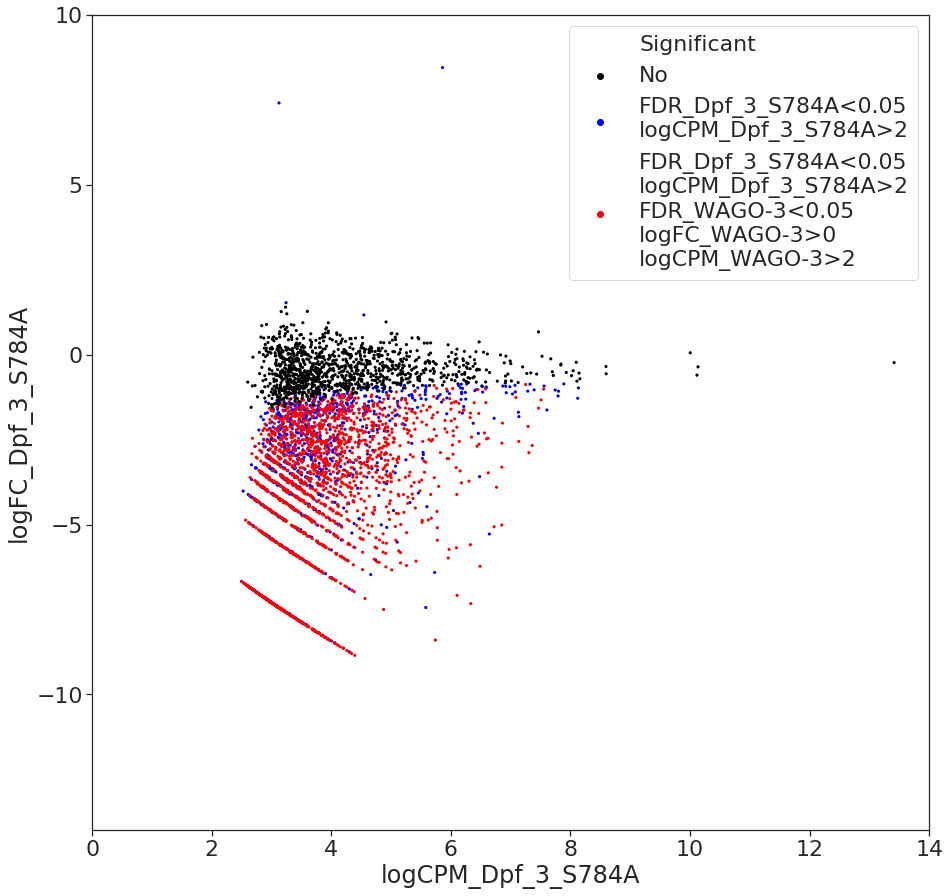

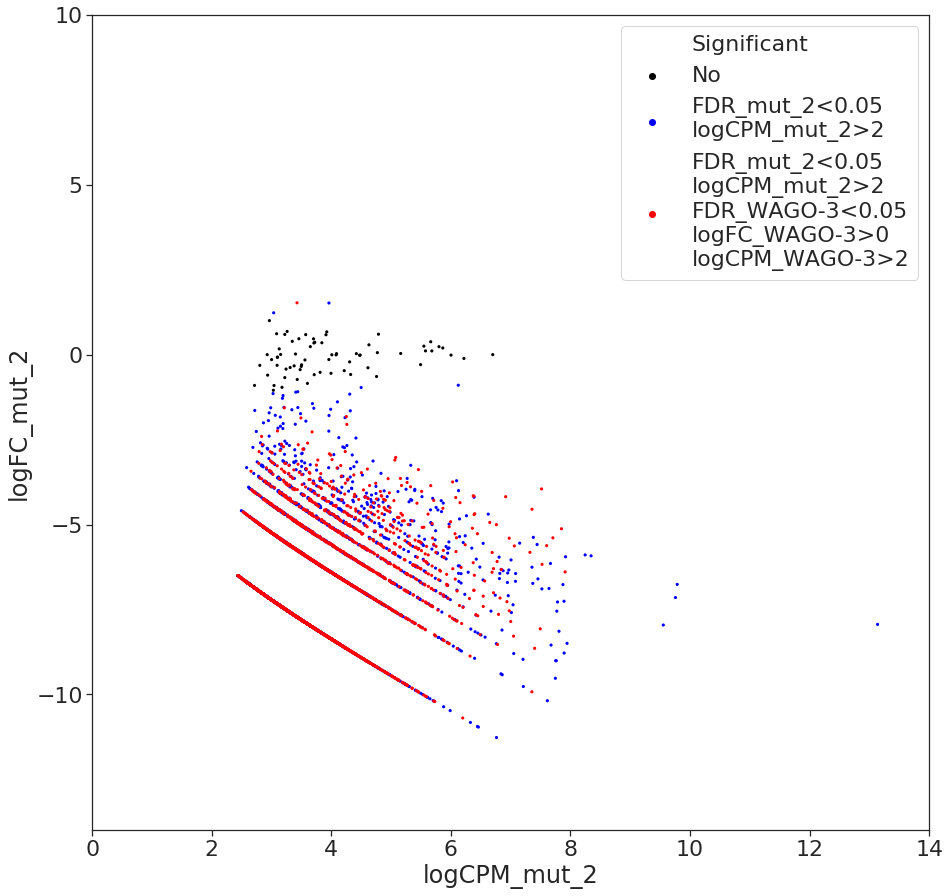

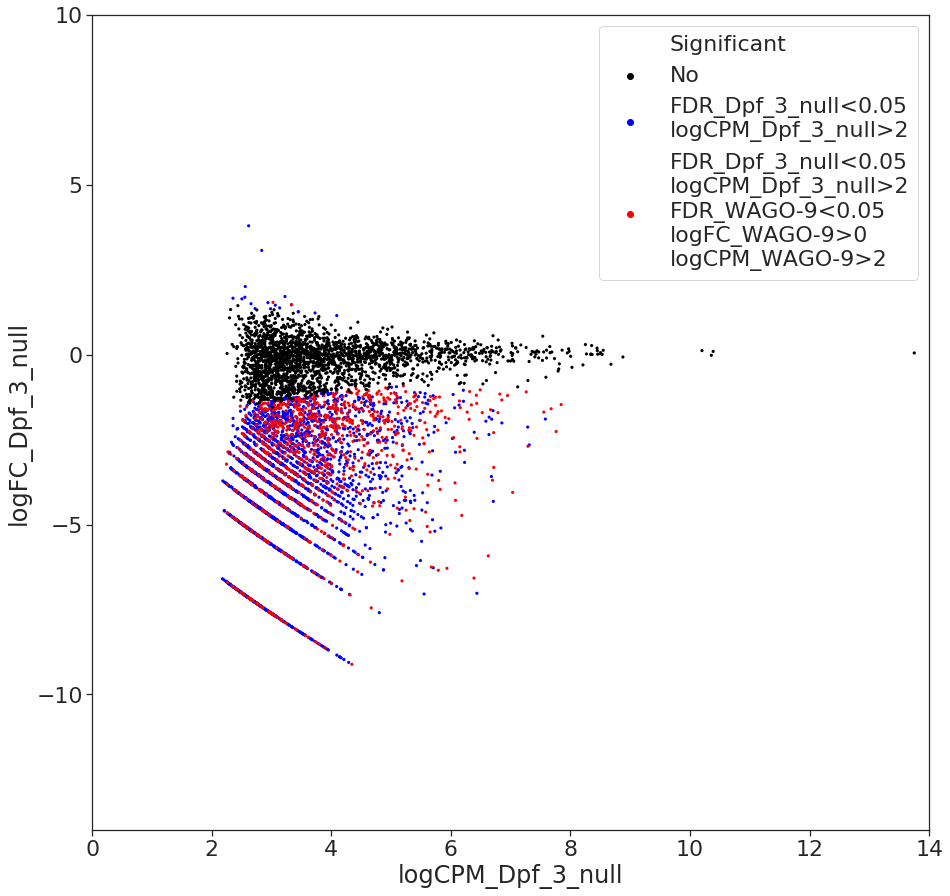

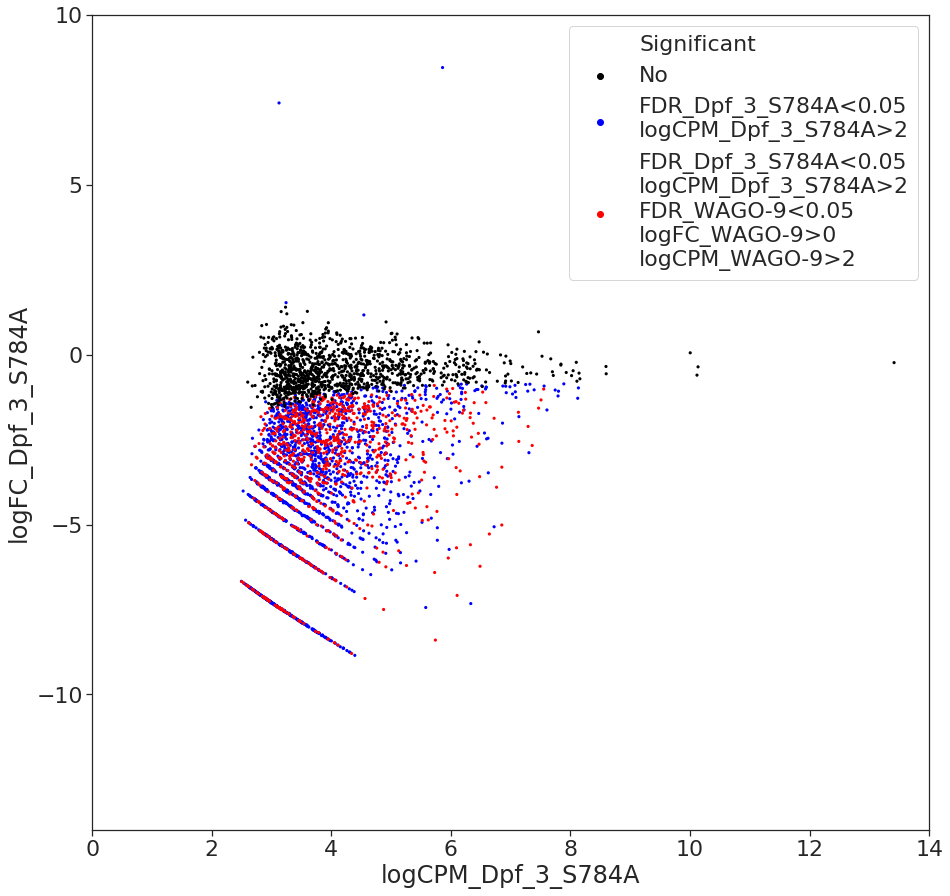

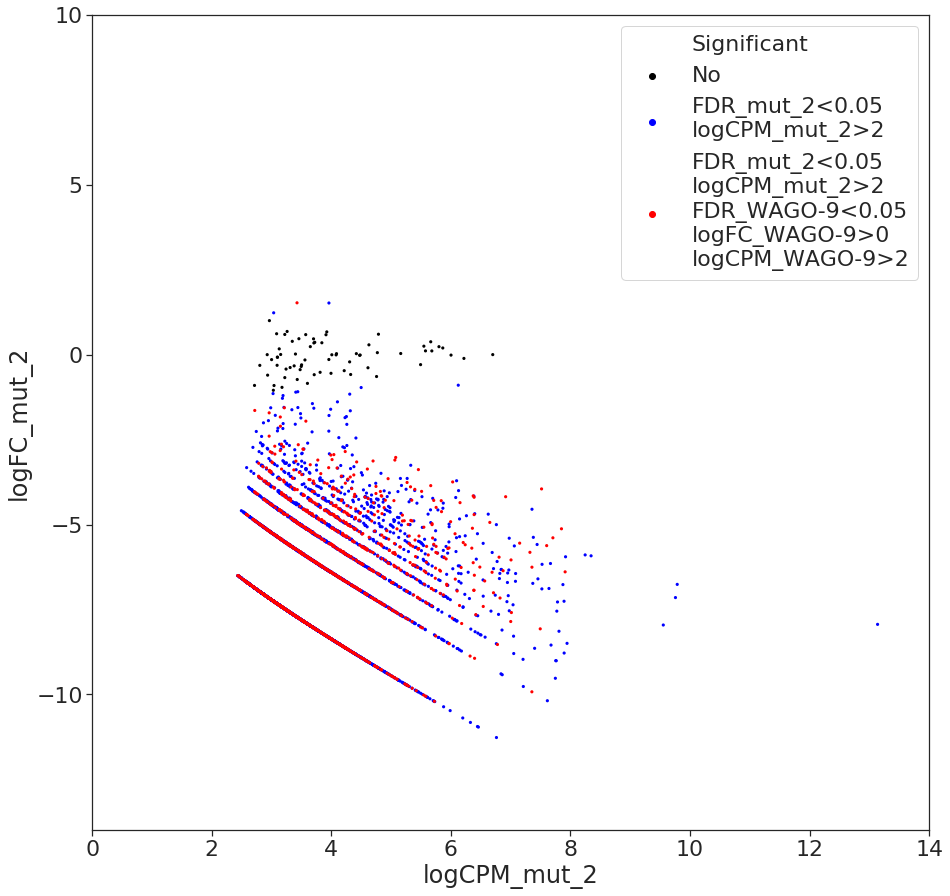

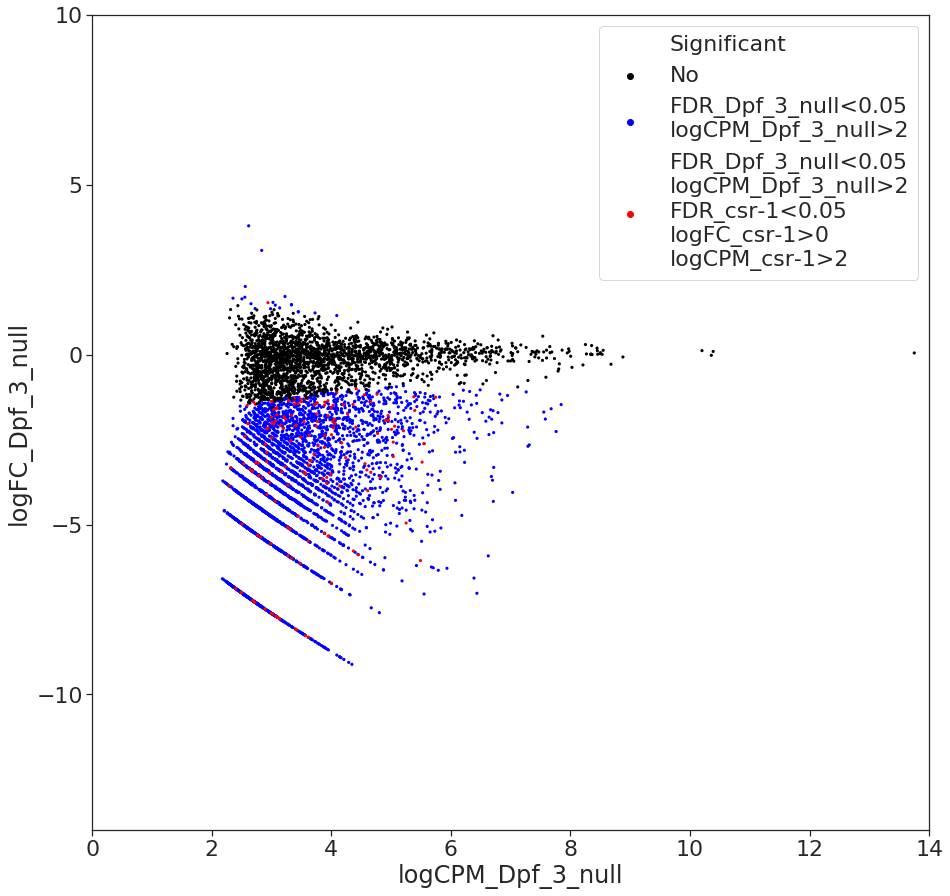

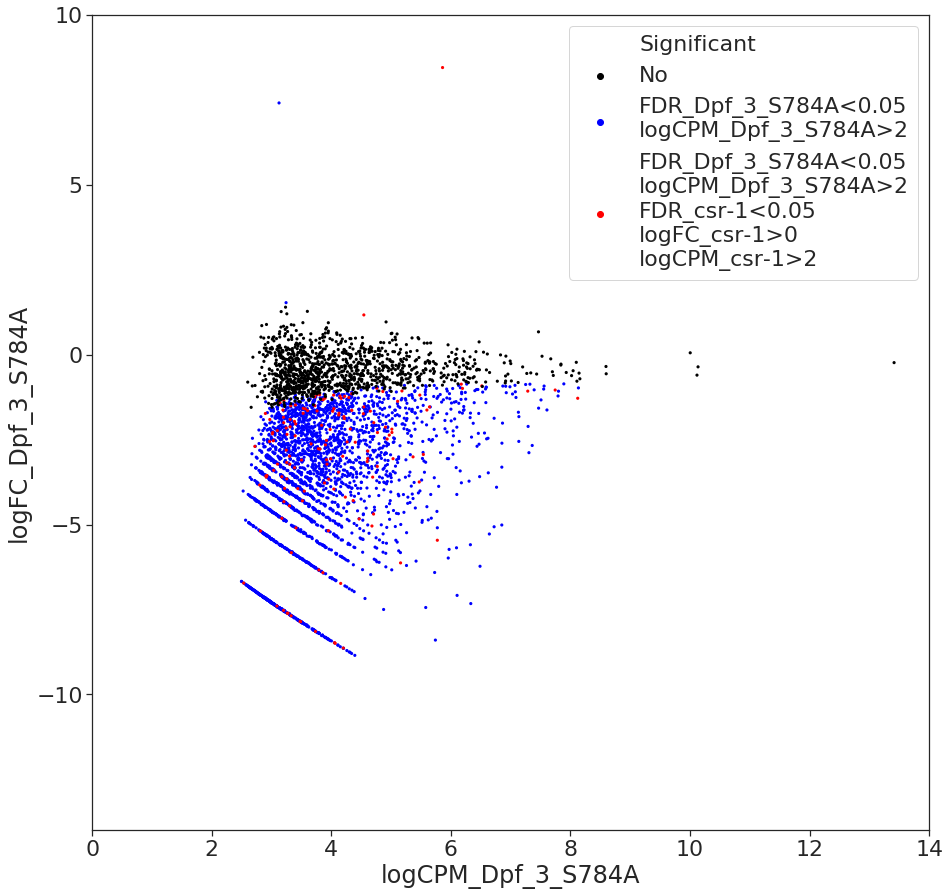

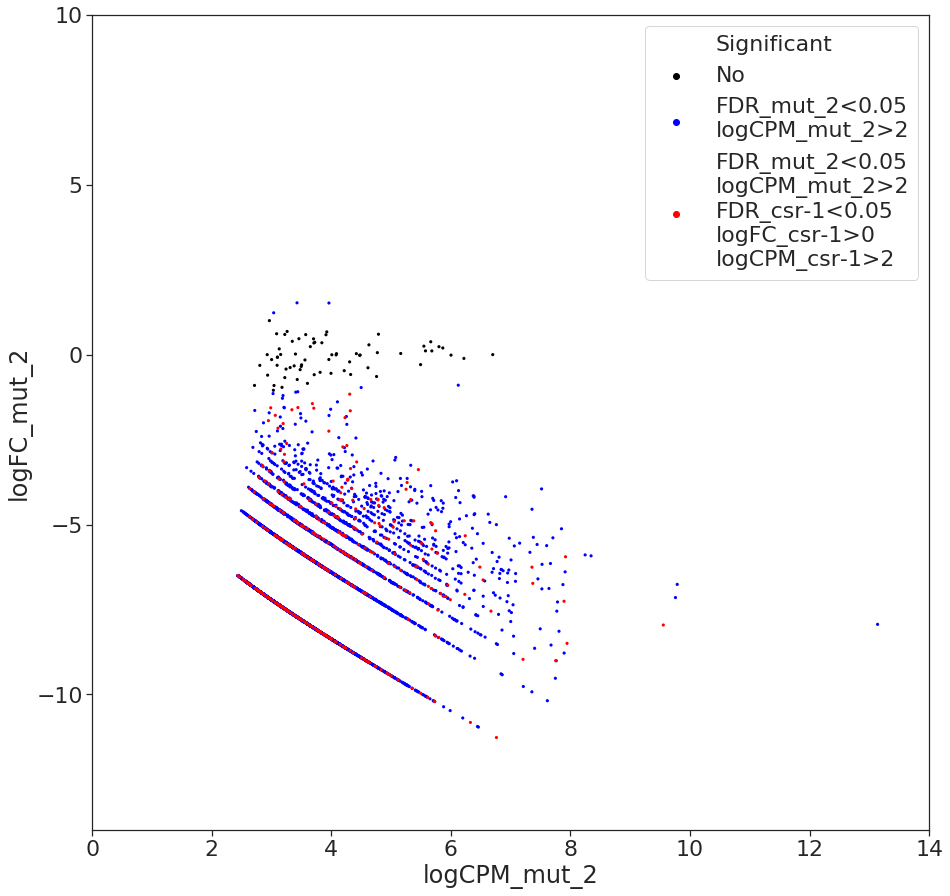

In [19]:
# make plots without IPs
plt.figure(figsize=(15,15))
df_wago_3_Dpf_3_null_lm_s = prepare_sc_plot_simple(df_wago_3_Dpf_3_null, Dpf_3_null_name)
df_wago_3_Dpf_3_null_lm_s.get_figure().savefig(f"plots/MA_{Dpf_3_null_name}.pdf")

plt.figure(figsize=(15,15))
df_wago_3_Dpf_3_S784A_lm_s = prepare_sc_plot_simple(df_wago_3_Dpf_3_S784A, Dpf_3_S784A_name)
df_wago_3_Dpf_3_S784A_lm_s.get_figure().savefig(f"plots/MA_{Dpf_3_S784A_name}.pdf")

plt.figure(figsize=(15,15))
df_wago_3_mut_2_lm_s = prepare_sc_plot_simple(df_wago_3_mut_2, mut_2_name)
df_wago_3_mut_2_lm_s.get_figure().savefig(f"plots/MA_{mut_2_name}.pdf")


# WAGO-3
plt.figure(figsize=(15,15))
df_wago_3_Dpf_3_null_lm = prepare_sc_plot(df_wago_3_Dpf_3_null, ip_name, Dpf_3_null_name)
df_wago_3_Dpf_3_null_lm.get_figure().savefig(f"plots/MA_{Dpf_3_null_name}_mark_{ip_name}.pdf")

plt.figure(figsize=(15,15))
df_wago_3_Dpf_3_S784A_lm = prepare_sc_plot(df_wago_3_Dpf_3_S784A, ip_name, Dpf_3_S784A_name)
df_wago_3_Dpf_3_S784A_lm.get_figure().savefig(f"plots/MA_{Dpf_3_S784A_name}_mark_{ip_name}.pdf")

plt.figure(figsize=(15,15))
df_wago_3_mut_2_lm = prepare_sc_plot(df_wago_3_mut_2, ip_name, mut_2_name)
df_wago_3_mut_2_lm.get_figure().savefig(f"plots/MA_{mut_2_name}_mark_{ip_name}.pdf")


# WAGO-9
plt.figure(figsize=(15,15))
df_wago_9_Dpf_3_null_lm = prepare_sc_plot(df_wago_9_Dpf_3_null, ip_wago_9_name, Dpf_3_null_name)
df_wago_9_Dpf_3_null_lm.get_figure().savefig(f"plots/MA_{Dpf_3_null_name}_mark_{ip_wago_9_name}.pdf")

plt.figure(figsize=(15,15))
df_wago_9_Dpf_3_S784A_lm = prepare_sc_plot(df_wago_9_Dpf_3_S784A, ip_wago_9_name, Dpf_3_S784A_name)
df_wago_9_Dpf_3_S784A_lm.get_figure().savefig(f"plots/MA_{Dpf_3_S784A_name}_mark_{ip_wago_9_name}.pdf")

plt.figure(figsize=(15,15))
df_wago_9_mut_2_lm = prepare_sc_plot(df_wago_9_mut_2, ip_wago_9_name, mut_2_name)
df_wago_9_mut_2_lm.get_figure().savefig(f"plots/MA_{mut_2_name}_mark_{ip_wago_9_name}.pdf")

# crs-1
plt.figure(figsize=(15,15))
df_csr_1_Dpf_3_null_lm = prepare_sc_plot(df_csr_1_Dpf_3_null, ip_csr_1_name, Dpf_3_null_name)
df_csr_1_Dpf_3_null_lm.get_figure().savefig(f"plots/MA_{Dpf_3_null_name}_mark_{ip_csr_1_name}.pdf")

plt.figure(figsize=(15,15))
df_csr_1_Dpf_3_S784A_lm = prepare_sc_plot(df_csr_1_Dpf_3_S784A, ip_csr_1_name, Dpf_3_S784A_name)
df_csr_1_Dpf_3_S784A_lm.get_figure().savefig(f"plots/MA_{Dpf_3_S784A_name}_mark_{ip_csr_1_name}.pdf")

plt.figure(figsize=(15,15))
df_csr_1_mut_2_lm = prepare_sc_plot(df_csr_1_mut_2, ip_csr_1_name, mut_2_name)
df_csr_1_mut_2_lm.get_figure().savefig(f"plots/MA_{mut_2_name}_mark_{ip_csr_1_name}.pdf")

# Venn diagrams

In [20]:
# read in dataframe
df_Dpf_3_null = prepare_df(Dpf_3_null_path, Dpf_3_null_name)
df_Dpf_3_S784A = prepare_df(Dpf_3_S784A_path, Dpf_3_S784A_name)
df_mut_2 = prepare_df(mut_2_path, mut_2_name)

In [21]:
#["logFC_Dpf_3_null"]<

small_RNAs_22G_df_Dpf_3_null = df_Dpf_3_null[df_Dpf_3_null["Significant_Dpf_3_null"] == "FDR<0.05\nlogCPM>2"]["id"].tolist()
small_RNAs_22G_df_Dpf_3_S784A = df_Dpf_3_S784A[df_Dpf_3_S784A["Significant_Dpf_3_S784A"] == "FDR<0.05\nlogCPM>2"]["id"].tolist()
small_RNAs_22G_df_mut_2 = df_mut_2[df_mut_2["Significant_mut_2"] == "FDR<0.05\nlogCPM>2"]["id"].tolist()

In [22]:
len(small_RNAs_22G_df_Dpf_3_null), len(small_RNAs_22G_df_Dpf_3_S784A), len(small_RNAs_22G_df_mut_2)

(3586, 2725, 5375)

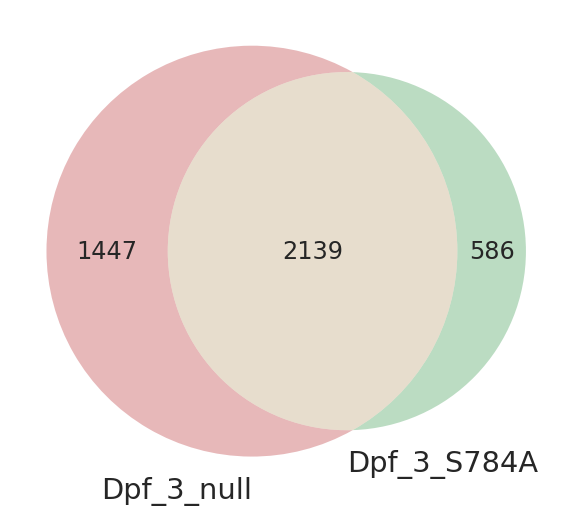

In [23]:
plt.figure(figsize=(10,10))
venn2([set(small_RNAs_22G_df_Dpf_3_null), set(small_RNAs_22G_df_Dpf_3_S784A)], ['Dpf_3_null', 'Dpf_3_S784A'])

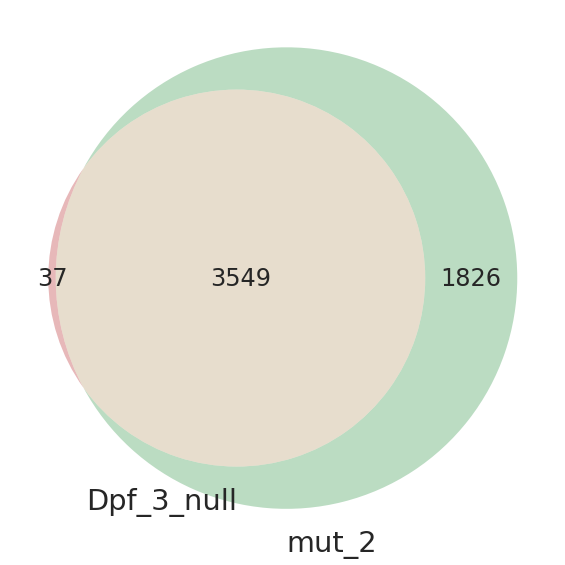

In [24]:
plt.figure(figsize=(10,10))
venn2([set(small_RNAs_22G_df_Dpf_3_null), set(small_RNAs_22G_df_mut_2)], ['Dpf_3_null', 'mut_2'])

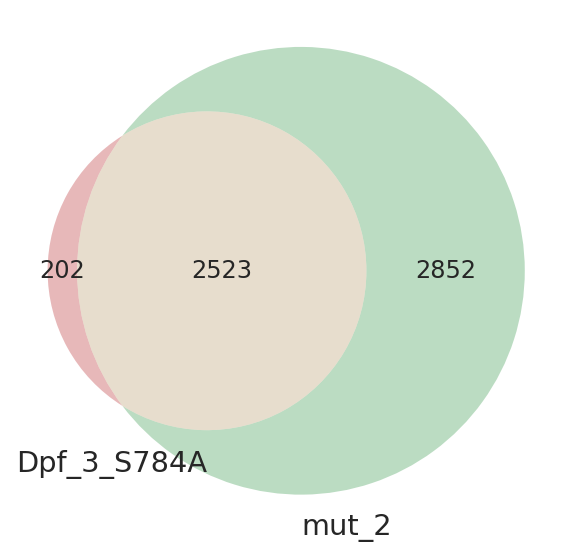

In [25]:
plt.figure(figsize=(10,10))
venn2([set(small_RNAs_22G_df_Dpf_3_S784A), set(small_RNAs_22G_df_mut_2)], ['Dpf_3_S784A', 'mut_2'])